# Arbitrary Polynomial Approximation
We show builtin functionality to approximate functions of any kind

In [1]:
import numpy as np
from syft.nonlin import PolyFunction
from syft import TensorBase

Approximate sigmoid and tanh functions: default values for interpolation will be used

In [2]:
sigmoid = PolyFunction.from_approximation(lambda x: 1/(1+np.exp(-x)))
tanh = PolyFunction.from_approximation(np.tanh)

In [3]:
a = TensorBase(np.array([.1,.2,.3,.4]))
b = TensorBase(np.ones(4))

Evaluate the functions:

In [4]:
tanh(a)

array([ 0.08623656,  0.17168772,  0.25558203,  0.33717569])

In [5]:
tanh(b)

array([ 0.74340583,  0.74340583,  0.74340583,  0.74340583])

In [6]:
sigmoid(a)

array([ 0.52468553,  0.54926504,  0.57363378,  0.59768949])

In [7]:
sigmoid(b)

array([ 0.73033151,  0.73033151,  0.73033151,  0.73033151])

## Derivative approximation
If no derivative function is specified, the derivative is calculated starting from the fitted polynomial:

In [8]:
tanh.derivative(a)

array([ 0.85974058,  0.84799462,  0.8286498 ,  0.80204958])

In [9]:
sigmoid.derivative(a)

array([ 0.24650127,  0.24491417,  0.24228997,  0.23865986])

Alternatively you can specify a function yourself, and polynomial interpolation will be carried out on such function:

In [10]:
tanh_derivative = lambda x: 1 - np.square(np.tanh(x))

In [11]:
tanh_with_derivative = PolyFunction.from_approximation(np.tanh, tanh_derivative)

We get different outputs as the derivatives have been built in different ways:

In [12]:
tanh.derivative(a)

array([ 0.85974058,  0.84799462,  0.8286498 ,  0.80204958])

In [13]:
tanh_with_derivative.derivative(a)

array([ 0.89167425,  0.87746319,  0.85413932,  0.82223476])

## Approximation plotting
Plot approximated functions:

In [14]:
import matplotlib.pyplot as plt
x = np.arange(-5,5,0.5)

We start by plotting the functions:

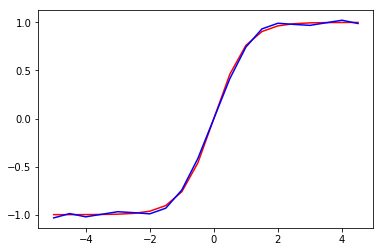

In [15]:
plt.plot(x, np.tanh(x), 'r', x, tanh_with_derivative(x),'b')
plt.show()

We also plot the derivatives: original, interpolated and differentiated from primitive interpolation:

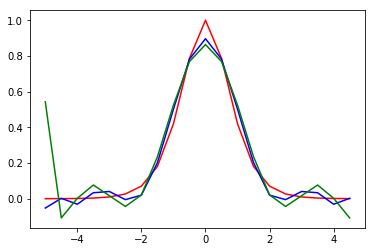

In [16]:
plt.plot(x, tanh_derivative(x), 'r', x, tanh_with_derivative.derivative(x),'b',x, tanh.derivative(x),'g')
plt.show()

## Nodes distribution
When fitting you can specify a different node distribution, or a custom function calculating the needed nodes.
One example is the Chebyshev node distribution, which removes [Runge's phenomenon](https://en.wikipedia.org/wiki/Runge%27s_phenomenon)

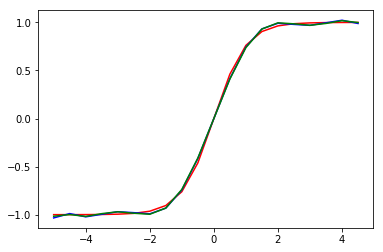

In [17]:
tanh_cheby = PolyFunction.from_approximation(np.tanh, tanh_derivative, distribution='cheby')
plt.plot(x, np.tanh(x), 'r', x, tanh_with_derivative(x),'b', x, tanh_cheby(x),'g')
plt.show()

Plotting the derivative yields a more significative difference:

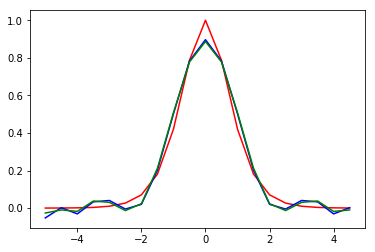

In [18]:
plt.plot(x, tanh_derivative(x), 'r', x, tanh_with_derivative.derivative(x),'b', x, tanh_cheby.derivative(x),'g')
plt.show()

## Interpolation vs Extrapolation
Everything is fine!.. right?
The problem with interpolation is getting the function to extrapolate well.
By plotting the functions on a bigger interval we can see they start diverging:

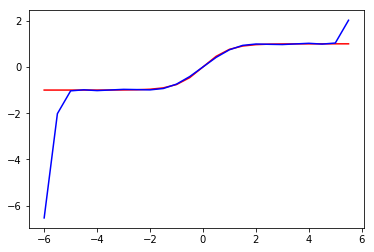

In [19]:
y = np.arange(-6,6,0.5)
plt.plot(y, np.tanh(y), 'r', y, tanh_with_derivative(y),'b')
plt.show()